## Observable Trends
#Most rides and drivers are in the Urban areas and the average fares are also significantly less in the urban cities.
#The Rural areas do not have enough coverage for the rides and there is good scope for ride service provided the fares can be kept reasonable. 
#Suburban areas have higher average costs per ride and has more drivers than rural, but still much lesser than the urban cities. 
#There is a significant variation in average fares for Urban, Suburban and Rural cities. 


In [59]:
# Import relevant libraries
#%matplotlib notebook
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [60]:
#Read the ride_data and city_data csv files into pandas dataframes. 
ride_df = pd.read_csv("raw_data/ride_data.csv")
city_df = pd.read_csv("raw_data/city_data.csv")



In [61]:
#Merge the two dataframes on city.
ride_city_df = pd.merge(ride_df,city_df,on="city")
ride_city_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [79]:
#Split into 3 categories
ride_city_urban = ride_city_df.loc[ride_city_df["type"]=="Urban"]
ride_city_suburban = ride_city_df.loc[ride_city_df["type"]=="Suburban"]
ride_city_rural = ride_city_df.loc[ride_city_df["type"]=="Rural"]


In [80]:
ride_city_urban.head()
ride_city_suburban.head()
ride_city_rural.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2018-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2018-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2018-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2018-04-07 23:42:07,10.79,1615474447641,9,Rural


In [81]:
#Count of rides per type, city and average fare per type,city. 

ride_city_df_group_urban = ride_city_df_gp_urban.groupby("city")
ride_city_df_ridecnt_urban = ride_city_df_group_urban["ride_id"].count()
ride_city_df_avgfare_urban = ride_city_df_group_urban["fare"].mean()

#For suburban
ride_city_df_group_suburban = ride_city_df_gp_suburban.groupby("city")
ride_city_df_ridecnt_suburban = ride_city_df_group_suburban["ride_id"].count()
ride_city_df_avgfare_suburban = ride_city_df_group_suburban["fare"].mean()

#for Rural
ride_city_df_group_rural = ride_city_df_gp_rural.groupby("city")
ride_city_df_ridecnt_rural = ride_city_df_group_rural["ride_id"].count()
ride_city_df_avgfare_rural = ride_city_df_group_rural["fare"].mean()

In [83]:
ride_city_df_avgfare_urban.head()
ride_city_df_avgfare_suburban.head()
ride_city_df_avgfare_rural.head()



city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [84]:
#number of Drivers per type, city 
city_df_urban = city_df.loc[city_df["type"]=="Urban"]
city_df_suburban = city_df.loc[city_df["type"]=="Suburban"]
city_df_rural = city_df.loc[city_df["type"]=="Rural"]



In [67]:
city_df_urban.head()
city_df_suburban.head()
city_df_rural.head()


,city,driver_count,type
102,South Jennifer,7,Rural
103,West Heather,4,Rural
104,Newtonview,1,Rural
105,North Holly,8,Rural
106,Michaelberg,6,Rural


In [85]:
city_df_urban_groupbycity = city_df_urban.groupby("city")
city_df_urban_drivercnt = city_df_urban_groupbycity["driver_count"].sum()

#Driver count for suburban
city_df_suburban_groupbycity = city_df_suburban.groupby("city")
city_df_suburban_drivercnt = city_df_suburban_groupbycity["driver_count"].sum()

#Driver count for rural
city_df_rural_groupbycity = city_df_rural.groupby("city")
city_df_rural_drivercnt = city_df_rural_groupbycity["driver_count"].sum()

In [86]:
city_df_urban_drivercnt.head()
city_df_suburban_drivercnt.head()
city_df_rural_drivercnt.head()

city
Bradshawfurt      7
Garzaport         7
Harringtonfort    4
Jessicaport       1
Lake Jamie        4
Name: driver_count, dtype: int64

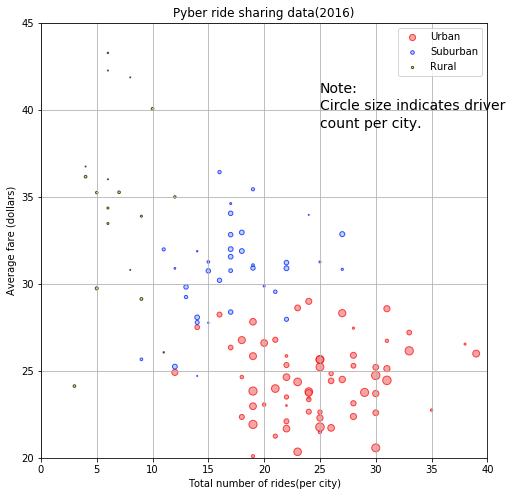

In [92]:
#plot the values as a bubble chart.
plt.figure(figsize=(8,8))

#plot values for urban
plt.scatter(ride_city_df_ridecnt_urban,ride_city_df_avgfare_urban,s=city_df_urban_drivercnt,alpha=0.7,
            marker='o',facecolors=["Lightcoral"],edgecolors=["Red"],label="Urban")

#Plot values for suburban.
plt.scatter(ride_city_df_ridecnt_suburban,ride_city_df_avgfare_suburban,s=city_df_suburban_drivercnt,
            alpha=0.7,marker='o',facecolors=["Lightskyblue"],edgecolors=["blue"],label="Suburban")  

#Plot values for rural.
plt.scatter(ride_city_df_ridecnt_rural,ride_city_df_avgfare_rural,s=city_df_rural_drivercnt,
            alpha=0.7,marker='o',facecolors=["Gold"],edgecolors=["Black"],label="Rural") 
                      

plt.xlim(0,40)
plt.ylim(20,45)


plt.title("Pyber ride sharing data(2016)")
plt.xlabel("Total number of rides(per city)")
plt.ylabel("Average fare (dollars)")
plt.legend(loc='upper right')
plt.grid()

plt.text(25, 41, "Note:", fontsize=14)
plt.text(25, 40, "Circle size indicates driver", fontsize=14)
plt.text(25, 39, "count per city.", fontsize=14)


plt.show()


In [105]:
#% of total fares by city type
ride_city_df2 = ride_city_df
ride_city_df2_totalsbytype = ride_city_df2.groupby("type")["fare"].sum()
ride_city_df2_totalsbytype


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

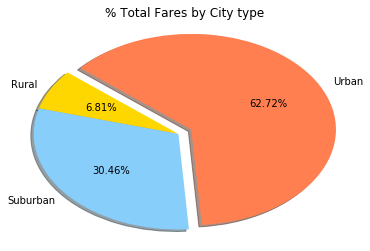

In [104]:
# Total fares by city type.
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=("Gold","Lightskyblue","Coral")

plt.pie(ride_city_df2_totalsbytype, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)

plt.title("% Total Fares by City type")

plt.axis("auto")

plt.show()


In [95]:
# Total rides by city type.
ride_city_df3 = ride_city_df
ride_city_df2_totalridesbytype = ride_city_df2.groupby("type")["ride_id"].count()
ride_city_df2_totalridesbytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

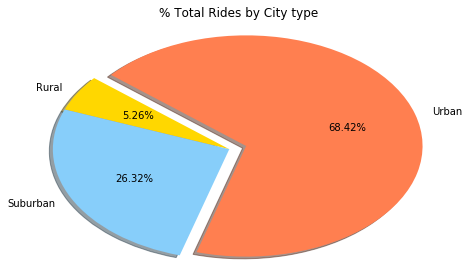

In [107]:
# % Total rides by city type.

explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=("Gold","Lightskyblue","Coral")

plt.pie(ride_city_df2_totalridesbytype, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)

plt.title("% Total Rides by City type")
plt.tight_layout()
plt.axis("auto")

plt.show()

In [99]:
# Drivers rides by city type.
city_df2 = city_df
city_df2_drivercntbytype = city_df2.groupby("type")["driver_count"].sum()
city_df2_drivercntbytype 

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

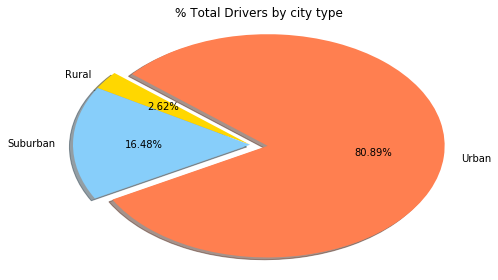

In [102]:
# % Total rides by city type.

explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=("Gold","Lightskyblue","Coral")

plt.pie(city_df2_drivercntbytype, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)

plt.title("% Total Drivers by city type")
plt.tight_layout()

plt.axis("auto")


plt.show()

In [ ]:
# # # # # Observations:
# # # # #   1. The vast majority of drivers by city type is urban 80%, whereas only 2.6% are rural drivers.
# # # #       This also means that there is nearly double the amount of rides needed in rural than there are drivers.
# # #       2. There is a greater percentage of urban drivers than the percentage of urban rides.
# # #         Like rural, suburban rides exceed the percentage of suburban drivers.
# # #         Meaning roughly 12% of urban drivers are driving to rural or suburban areas.
# # #         Possible this may contribute to higher suburban and rural ride fees.
# #         3. Percentage of suburban and rural fares (31%) are higher than percentage (37%) of rides to rural and suburban areas.
#             Rural and suburban riders are paying roughly 6% more than their urban rider counterparts.